In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=22e03309c961f0db60ba5bbbfda6232f


In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)  

dusti tj
kapaa us
illoqqortoormiut gl
wanaka nz
qaanaaq gl
bhuj in
tateyama jp
tiksi ru
qaanaaq gl
jatai br
louisbourg ca
paliseul be
tuktoyaktuk ca
pozo colorado py
kahului us
sainte-suzanne re
san cristobal ec
hermanus za
cherskiy ru
hermanus za
bengkulu id
soloneshnoye ru
hermanus za
kerema pg
mayo ca
vaitupu wf
fort nelson ca
vila franca do campo pt
nizhneyansk ru
khonuu ru
illoqqortoormiut gl
ankara tr
kieta pg
kerema pg
hilo us
codrington ag
tupik ru
mata cn
ushuaia ar
hilo us
mogadishu so
cape town za
langres fr
kodiak us
hermanus za
chokurdakh ru
matara lk
cape town za
rikitea pf
kruisfontein za
mataura pf
taolanaro mg
auki sb
belushya guba ru
palembang id
wanning cn
kapaa us
bengkulu id
ushuaia ar
bengkulu id
cumra tr
cabo san lucas mx
vaini to
albany au
lagoa pt
bethel us
airai pw
grand river south east mu
hermanus za
rikitea pf
mananara mg
dingle ie
tuatapere nz
nioro ml
phrai bung th
atuona pf
whitehorse ca
hambantota lk
lompoc us
kattivakkam in
seymchan ru
kodiak us
kaitan

hermanus za
amderma ru
lubu cn
punta arenas cl
okhotsk ru
vila velha br
hithadhoo mv
atuona pf
busselton au
kushiro jp
gamba ga
talnakh ru
tasiilaq gl
solovetskiy ru
bokspits bw
new norfolk au
talnakh ru
san rafael del sur ni
aklavik ca
ushuaia ar
ushuaia ar
skalistyy ru
qaanaaq gl
puerto ayora ec
bambous virieux mu
yima cn
bonthe sl
hazorasp uz
dori bf
tiksi ru
vila velha br
ahipara nz
ushuaia ar
mahebourg mu
rikitea pf
ushuaia ar
portland au
severo-kurilsk ru
ushuaia ar
jamestown sh
iqaluit ca
kananga cd
busselton au
mahebourg mu
busselton au
lompoc us
emba kz
airai pw
tuktoyaktuk ca
cape town za
tsihombe mg
airai pw
kuche cn
wuzhou cn
roma au
harpanahalli in
richards bay za
barrow us
busselton au
talaya ru
yellowknife ca
atuona pf
moose factory ca
east london za
ji-parana br
mandera ke
santa clara mx
outlook ca
cidreira br
saint-raymond ca
ushuaia ar
hami cn
new norfolk au
kapaa us
morden ca
punta arenas cl
tsihombe mg
cape town za
rodoc ba
cap malheureux mu
illoqqortoormiut gl
riki

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [14]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

NameError: name 'city_url' is not defined

# Start code

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [ ]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
       # record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
   # city_url = url + "&q=" + cities[i]

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

        time.sleep(60)

        # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Processing Record 1 of Set 1 | dusti
City not found. Skipping...
Processing Record 2 of Set 1 | kapaa
City not found. Skipping...
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | wanaka
City not found. Skipping...
Processing Record 5 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 6 of Set 1 | bhuj
City not found. Skipping...
Processing Record 7 of Set 1 | tateyama
City not found. Skipping...
Processing Record 8 of Set 1 | tiksi
City not found. Skipping...
Processing Record 9 of Set 1 | jatai
City not found. Skipping...
Processing Record 10 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 11 of Set 1 | paliseul
City not found. Skipping...
Processing Record 12 of Set 1 | tuktoyaktuk
City not found. Skipping...
Processing Record 13 of Set 1 | pozo colorado
City not found. Skipping...
Processing Record 14 of Set 1 | kahului
City not found. Skipping...
Processing Record 15 of Set 1 | sainte-suzann

Processing Record 17 of Set 4 | san quintin
Processing Record 18 of Set 4 | margate
Processing Record 19 of Set 4 | grindavik
Processing Record 20 of Set 4 | san carlos
Processing Record 21 of Set 4 | port augusta
Processing Record 22 of Set 4 | saskylakh
Processing Record 23 of Set 4 | jiroft
Processing Record 24 of Set 4 | mingyue
Processing Record 25 of Set 4 | selje
Processing Record 26 of Set 4 | makakilo city
Processing Record 27 of Set 4 | shangzhi
Processing Record 28 of Set 4 | lander
Processing Record 29 of Set 4 | grand-santi
Processing Record 30 of Set 4 | mandan
Processing Record 31 of Set 4 | avarua
Processing Record 32 of Set 4 | jiddah
Processing Record 33 of Set 4 | pocone
Processing Record 34 of Set 4 | severo-kurilsk
Processing Record 35 of Set 4 | calvinia
Processing Record 36 of Set 4 | sambava
Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | slonim
Processing Record 39 of Set 4 | sterling
Processing Record 40 of Set 4 | vila velha
Pro

Processing Record 18 of Set 8 | dori
Processing Record 19 of Set 8 | kananga
Processing Record 20 of Set 8 | emba
Processing Record 21 of Set 8 | kuche
Processing Record 22 of Set 8 | wuzhou
Processing Record 23 of Set 8 | roma
Processing Record 24 of Set 8 | harpanahalli
Processing Record 25 of Set 8 | talaya
Processing Record 26 of Set 8 | moose factory
Processing Record 27 of Set 8 | ji-parana
Processing Record 28 of Set 8 | mandera
Processing Record 29 of Set 8 | santa clara
Processing Record 30 of Set 8 | outlook
Processing Record 31 of Set 8 | saint-raymond
Processing Record 32 of Set 8 | morden
Processing Record 33 of Set 8 | rodoc
Processing Record 34 of Set 8 | cap malheureux
Processing Record 35 of Set 8 | nyzhni sirohozy
Processing Record 36 of Set 8 | darnah
Processing Record 37 of Set 8 | moron
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | muisne
Processing Record 40 of Set 8 | natal
Processing Record 41 of Set 8 | kulachi
Processing Record 42 of S

Processing Record 17 of Set 12 | gorno-chuyskiy
Processing Record 18 of Set 12 | popondetta
Processing Record 19 of Set 12 | bereznik
Processing Record 20 of Set 12 | iwaki
Processing Record 21 of Set 12 | valparaiso
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | palmer
Processing Record 24 of Set 12 | sleaford
Processing Record 25 of Set 12 | mount gambier
Processing Record 26 of Set 12 | praya
Processing Record 27 of Set 12 | necochea
Processing Record 28 of Set 12 | vardo
Processing Record 29 of Set 12 | carolina
Processing Record 30 of Set 12 | bogale
Processing Record 31 of Set 12 | camana
Processing Record 32 of Set 12 | ambodifototra
Processing Record 33 of Set 12 | wuan
Processing Record 34 of Set 12 | igarka
Processing Record 35 of Set 12 | bathsheba
Processing Record 36 of Set 12 | joensuu
Processing Record 37 of Set 12 | inuvik
Processing Record 38 of Set 12 | crab hill
Processing Record 39 of Set 12 | leon
Processing Record 40 of Set 12 | rungata


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
1,Albany,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
2,Lagoa,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
3,Bethel,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
4,Airai,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
5,Grand River South East,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
6,Mananara,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
7,Dingle,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
8,Tuatapere,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19
9,Nioro,-21.2,-175.2,75.36,94,100,4.61,TO,2022-08-05 16:26:19


In [25]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
1,Albany,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
2,Lagoa,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
3,Bethel,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
4,Airai,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
5,Grand River South East,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
6,Mananara,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
7,Dingle,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
8,Tuatapere,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61
9,Nioro,TO,2022-08-05 16:26:19,-21.2,-175.2,75.36,94,100,4.61


In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

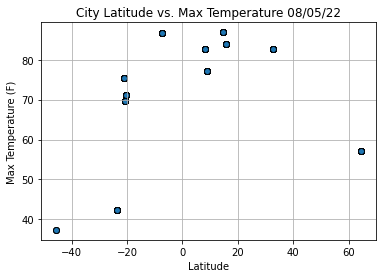

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

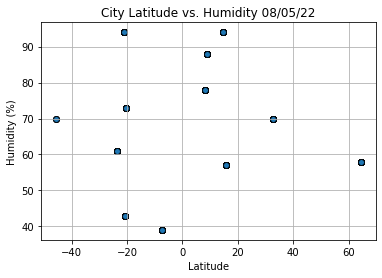

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

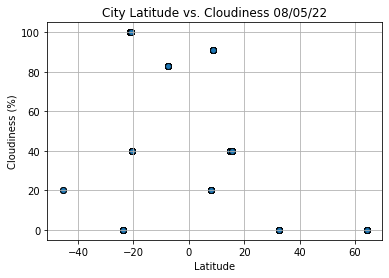

In [31]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

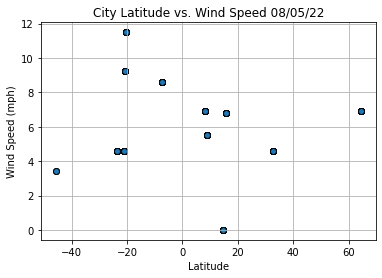

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

In [ ]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)